# K-Means
## Datensatz : Tetra

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import rand_score, adjusted_rand_score

In [2]:
# Laden des Datensatzes
features = open("data/Tetra.lrn", "r")
labels = open("data/Tetra.cls", "r")

## Datenvorverarbeitung

In [3]:
def prepo(features, labels):
    X=[]
    Y=[]
    
    for x in features:
        X.append(x.split("\t"))
    for y in labels:
        Y.append(y.split("\t"))
    
    # Convert from string
    X = np.array(X[4:]).astype(float)
    Y = np.array(Y[1:]).astype(float)
    
    # Remove the first rows
    X = np.delete(X, 0, 1)
    Y = np.delete(Y, 0, 1)
    
    
    return X, Y.reshape(len(Y))

In [4]:
X_tetra, Y_tetra = prepo(features, labels)

In [5]:
print("X =", X_tetra.shape,"\nY =",Y_tetra.shape)

X = (400, 3) 
Y = (400,)


## Datenvisualisierung

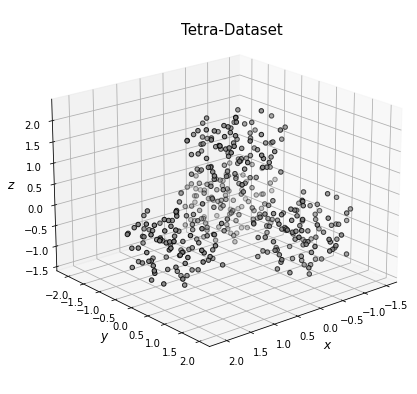

In [6]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection="3d", elev=20, azim=50)

# Datapoints plot
ax.scatter(X_tetra[:, 0], X_tetra[:, 1],
           zs=X_tetra[:, 2], c="gray",
           edgecolor="k", depthshade=True)

ax.set_zlabel("$z$", size=12)
ax.set_xlabel("$x$", size=12)
ax.set_ylabel("$y$", size=12)
plt.title("Tetra-Dataset", size=15, y=0.99, x=0.53)
plt.show()

## Der Algorithmus

In [7]:
kmeans = KMeans(n_clusters=4, init="random").fit(X_tetra)

centroids = kmeans.cluster_centers_
c_centroids = [0, 1, 2, 3]

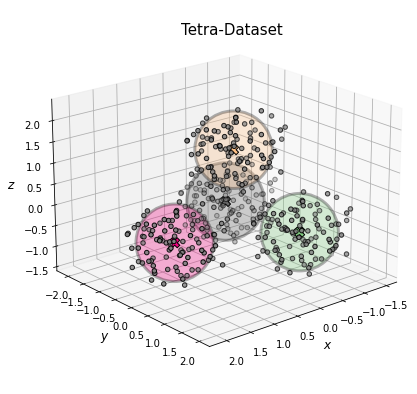

In [8]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection="3d", elev=20, azim=50)

# Datapoints plot
ax.scatter(X_tetra[:, 0], X_tetra[:, 1],
           zs=X_tetra[:, 2], c="gray",
           edgecolor="k", depthshade=True)

# Centroids plot
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
           c=c_centroids, marker="o", s=6000, edgecolor="k",
           depthshade=False, alpha=0.3, cmap="Accent", lw=3)
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
           c=c_centroids, marker="X", s=100, edgecolor="k",
           depthshade=False, cmap="Accent")

ax.set_zlabel("$z$", size=12)
ax.set_xlabel("$x$", size=12)
ax.set_ylabel("$y$", size=12)
plt.title("Tetra-Dataset", size=15, y=0.99, x=0.53)
plt.show()

## Clustering performance evaluation
### Rand index / Adjusted Rand Index

In [9]:
Y_kmean = kmeans.labels_

In [10]:
print("RI =",rand_score(Y_tetra, Y_kmean))
print("ARI =",adjusted_rand_score(Y_tetra, Y_kmean))

RI = 1.0
ARI = 1.0


In [11]:
Y_tetra

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [12]:
Y_kmean

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,